In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./datasets/incoded_data.csv')

In [4]:
df = df.drop(columns = ['Label.1','Idle Mean','Unnamed: 0'])

In [5]:
df['Label'] = df['Label'].str.lower().map({'normal': 0, 'malicious': 1})

In [6]:
df['Label'].unique()

array([1, 0], dtype=int64)

In [7]:
df.shape

(48622, 17)

In [8]:
df['Label'].value_counts()

Label
1    24311
0    24311
Name: count, dtype: int64

In [10]:
correlation = df.corr()['Label'].abs().sort_values(ascending=False)
best_features = correlation[correlation > 0.05].index  # Keep those with 5% or more correlation

df_selected = df[best_features]  # Keep only columns with the best features

In [11]:
df_selected

,Label,Protocol,Bwd Packet Length Mean,Flow Packets/s,Flow Bytes/s,Packet Length Mean,FIN Flag Count,Fwd IAT Mean,Bwd IAT Mean,Total Fwd Packet,Flow Duration,ACK Flag Count,Total Bwd packets
0,1,6.0,1208.106068,23.403374,21271.706661,908.785331,1.0,1.558542e+05,5.892614e+04,767,119384497.0,2794.0,2027.0
1,1,6.0,1151.860465,29.710733,25832.472330,869.374262,1.0,1.174066e+05,4.722171e+04,1021,119754701.0,3558.0,2537.0
2,1,6.0,1204.348375,19.721110,17486.409275,886.538363,1.0,1.743521e+05,7.158810e+04,683,118908117.0,2345.0,1662.0
3,1,6.0,271.500000,5.407393,1468.107196,325.800000,1.0,7.397280e+05,7.395260e+05,2,739728.0,4.0,2.0
4,1,6.0,282.500000,26.797079,7570.174851,339.000000,1.0,1.492700e+05,1.490460e+05,2,149270.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,0,6.0,130.777778,8368.200837,225.967541,55.800000,1.0,4.154860e+05,6.130710e+05,1,239.0,2.0,1.0
48618,0,6.0,49.623188,1.135491,55.705868,48.715328,1.0,1.814724e+06,1.761346e+06,67,119771943.0,136.0,69.0
48619,0,6.0,130.777778,78.403701,225.967541,55.800000,1.0,4.154860e+05,6.130710e+05,1,25509.0,2.0,1.0
48620,0,6.0,31.333333,0.178971,7.146042,37.533333,1.0,1.117498e+07,1.462816e+07,8,78225120.0,14.0,6.0


In [12]:
import numpy as np

# Check for infinity values
print(df[['Fwd IAT Mean', 'Bwd IAT Mean']].replace([np.inf, -np.inf], np.nan).isna().sum())

Fwd IAT Mean    0
Bwd IAT Mean    0
dtype: int64


In [13]:
df['Fwd IAT Mean'] = np.log1p(df['Fwd IAT Mean'])  # log(1 + x) to handle zero values
df['Bwd IAT Mean'] = np.log1p(df['Bwd IAT Mean'])

In [14]:
df

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Label
0,6.0,119384497.0,767,2027.0,21271.706661,23.403374,118.228162,1208.106068,908.785331,606.092512,11.956683,10.984057,2.0,2794.0,1.0,1.0,1
1,6.0,119754701.0,1021,2537.0,25832.472330,29.710733,167.766895,1151.860465,869.374262,612.115805,11.673407,10.762630,2.0,3558.0,1.0,1.0,1
2,6.0,118908117.0,683,1662.0,17486.409275,19.721110,113.688141,1204.348375,886.538363,616.479582,12.068838,11.178698,2.0,2345.0,1.0,1.0,1
3,6.0,739728.0,2,2.0,1468.107196,5.407393,271.500000,271.500000,325.800000,297.413349,13.514039,13.513766,2.0,4.0,1.0,1.0,1
4,6.0,149270.0,2,2.0,7570.174851,26.797079,282.500000,282.500000,339.000000,309.463245,11.913519,11.912017,2.0,4.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,6.0,239.0,1,1.0,225.967541,8368.200837,37.000000,130.777778,55.800000,101.613647,12.937207,13.326238,2.0,2.0,1.0,1.0,0
48618,6.0,119771943.0,67,69.0,55.705868,1.135491,48.477612,49.623188,48.715328,179.091824,14.411445,14.381589,2.0,136.0,1.0,1.0,0
48619,6.0,25509.0,1,1.0,225.967541,78.403701,37.000000,130.777778,55.800000,101.613647,12.937207,13.326238,2.0,2.0,1.0,1.0,0
48620,6.0,78225120.0,8,6.0,7.146042,0.178971,46.375000,31.333333,37.533333,65.516483,16.229188,16.498459,2.0,14.0,1.0,1.0,0


In [15]:
import numpy as np

# Check for infinite values
print(df[['Fwd IAT Mean', 'Bwd IAT Mean']].isin([np.inf, -np.inf]).sum())


Fwd IAT Mean    0
Bwd IAT Mean    0
dtype: int64


In [16]:
print(df[['Fwd IAT Mean', 'Bwd IAT Mean']].describe())

       Fwd IAT Mean  Bwd IAT Mean
count  48622.000000  48622.000000
mean      12.583139     13.135334
std        3.022776      2.268179
min        0.693147      0.693147
25%       12.923504     13.326238
50%       12.937207     13.326238
75%       13.268917     13.326238
max       18.602876     18.601389


In [17]:
print(df.describe())

           Protocol  Flow Duration  Total Fwd Packet  Total Bwd packets  \
count  48622.000000   4.862200e+04      48622.000000       48622.000000   
mean      11.734832   1.951370e+07        264.013451         236.325717   
std        5.495041   3.821592e+07       2786.512120        2740.858904   
min        6.000000   1.000000e+00          1.000000           1.000000   
25%        6.000000   7.830000e+02          1.000000           1.000000   
50%       17.000000   2.236320e+05          2.000000           2.000000   
75%       17.000000   9.559759e+06          3.000000           3.000000   
max       17.000000   1.200000e+08     174352.000000      345563.000000   

       Flow Bytes/s  Flow Packets/s  Fwd Packet Length Mean  \
count  4.862200e+04    4.862200e+04            48622.000000   
mean   1.253832e+05    7.718881e+03               79.001692   
std    6.710688e+05    3.988018e+04              180.937972   
min    3.328416e-02    1.666877e-02                0.003914   
25%    1.

In [18]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [19]:
df['Flow Packets/s'].fillna(df['Flow Packets/s'].median(), inplace=True)

C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_14684\1906756906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flow Packets/s'].fillna(df['Flow Packets/s'].median(), inplace=True)


In [20]:
df.duplicated().sum()

10368

In [22]:
df2 = df.drop_duplicates()

In [23]:
df2

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Label
0,6.0,119384497.0,767,2027.0,21271.706661,23.403374,118.228162,1208.106068,908.785331,606.092512,11.956683,10.984057,2.0,2794.0,1.0,1.0,1
1,6.0,119754701.0,1021,2537.0,25832.472330,29.710733,167.766895,1151.860465,869.374262,612.115805,11.673407,10.762630,2.0,3558.0,1.0,1.0,1
2,6.0,118908117.0,683,1662.0,17486.409275,19.721110,113.688141,1204.348375,886.538363,616.479582,12.068838,11.178698,2.0,2345.0,1.0,1.0,1
3,6.0,739728.0,2,2.0,1468.107196,5.407393,271.500000,271.500000,325.800000,297.413349,13.514039,13.513766,2.0,4.0,1.0,1.0,1
4,6.0,149270.0,2,2.0,7570.174851,26.797079,282.500000,282.500000,339.000000,309.463245,11.913519,11.912017,2.0,4.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,6.0,239.0,1,1.0,225.967541,8368.200837,37.000000,130.777778,55.800000,101.613647,12.937207,13.326238,2.0,2.0,1.0,1.0,0
48618,6.0,119771943.0,67,69.0,55.705868,1.135491,48.477612,49.623188,48.715328,179.091824,14.411445,14.381589,2.0,136.0,1.0,1.0,0
48619,6.0,25509.0,1,1.0,225.967541,78.403701,37.000000,130.777778,55.800000,101.613647,12.937207,13.326238,2.0,2.0,1.0,1.0,0
48620,6.0,78225120.0,8,6.0,7.146042,0.178971,46.375000,31.333333,37.533333,65.516483,16.229188,16.498459,2.0,14.0,1.0,1.0,0


In [24]:
df2['Label'].value_counts()

Label
0    20407
1    17847
Name: count, dtype: int64

In [25]:
df2['Label'].value_counts(normalize=True) * 100

Label
0    53.346055
1    46.653945
Name: proportion, dtype: float64

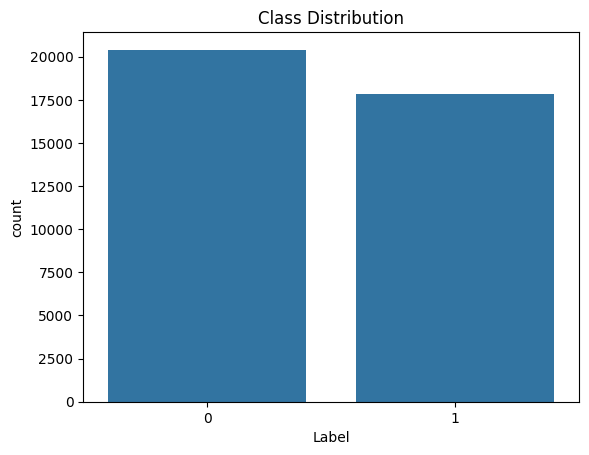

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df2['Label'])
plt.title('Class Distribution')
plt.show()

In [27]:
df2.corr()['Label'].sort_values(ascending=False)

Label                     1.000000
Protocol                  0.272940
Bwd Packet Length Mean    0.126298
Packet Length Mean        0.077375
Total Fwd Packet          0.067161
Bwd IAT Mean              0.058631
ACK Flag Count            0.056739
Total Bwd packets         0.055386
Fwd IAT Mean              0.046272
Flow Bytes/s              0.037715
RST Flag Count            0.036794
SYN Flag Count            0.020238
Flow Packets/s            0.001762
Fwd Packet Length Mean   -0.001257
Packet Length Std        -0.002752
Flow Duration            -0.026960
FIN Flag Count           -0.092639
Name: Label, dtype: float64

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['Label'])  # Features
y = df2['Label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

# Top Features
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f'{feature}: {importance:.4f}')


Flow Bytes/s: 0.1418
Flow Packets/s: 0.1262
Flow Duration: 0.1196
Bwd Packet Length Mean: 0.0840
Total Fwd Packet: 0.0807
Packet Length Mean: 0.0772
Fwd IAT Mean: 0.0739
Total Bwd packets: 0.0667
Packet Length Std: 0.0652
Fwd Packet Length Mean: 0.0559
Bwd IAT Mean: 0.0361
ACK Flag Count: 0.0342
Protocol: 0.0226
RST Flag Count: 0.0122
FIN Flag Count: 0.0028
SYN Flag Count: 0.0010


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
selected_features = ['Flow Bytes/s', 'Flow Duration', 'Flow Packets/s', 'Bwd Packet Length Mean', 'Total Fwd Packet', 'Total Bwd packets', 
                     'Packet Length Mean', 'Fwd IAT Mean', 'Packet Length Std', 'Fwd Packet Length Mean']

In [31]:
X = df2[selected_features]
y = df2['Label']

In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Predictions
y_pred = rf_model.predict(X_test)

In [36]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [37]:
print(f'✅ Accuracy: {accuracy:.4f}')
print('📊 Confusion Matrix:\n', conf_matrix)
print('📜 Classification Report:\n', report)

✅ Accuracy: 0.9075
📊 Confusion Matrix:
 [[3770  372]
 [ 336 3173]]
📜 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      4142
           1       0.90      0.90      0.90      3509

    accuracy                           0.91      7651
   macro avg       0.91      0.91      0.91      7651
weighted avg       0.91      0.91      0.91      7651



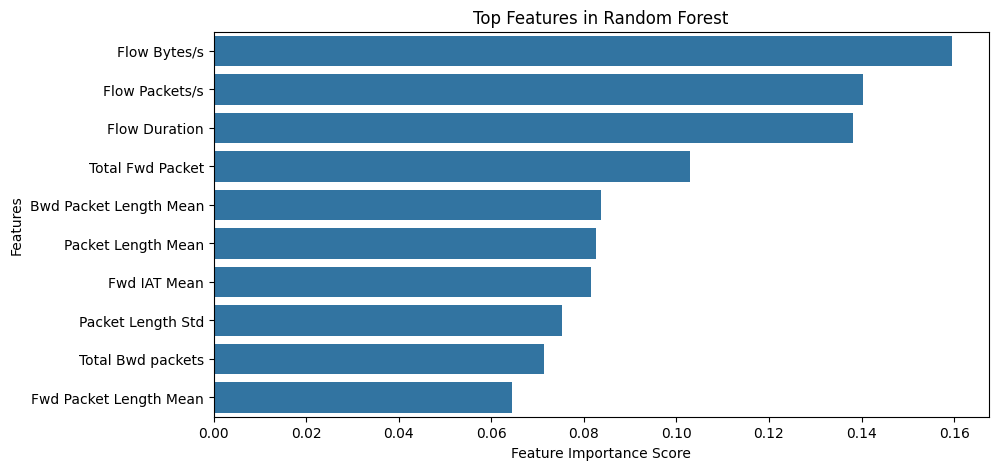

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(rf_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top Features in Random Forest')
plt.show()

In [39]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_tuned = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, 
                              n_iter=10, cv=3, verbose=2, n_jobs=-1)

rf_tuned.fit(X_train, y_train)

print(f'Best Parameters: {rf_tuned.best_params_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


In [40]:
new_transaction = [[500, 100, 30, 200, 20, 15, 10, 50, 30, 2900]]  # Example input
prediction = rf_model.predict(new_transaction)

if prediction[0] == 1:
    print("🚨 Fraud Detected!")
else:
    print("✅ Transaction is Safe.")


🚨 Fraud Detected!


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
safe_samples = [
    [3000, 50, 20, 100, 10, 8, 50, 20, 15, 80],   # Normal transaction
    [12000, 400, 90, 800, 40, 38, 250, 100, 75, 500],    # Slightly higher but safe
    [2800, 55, 25, 95, 11, 10, 52, 22, 16, 78]    # Close to normal
]

for i, transaction in enumerate(safe_samples):
    prediction = rf_model.predict([transaction])
    print(f"Sample {i+1}: {'🚨 Fraud' if prediction[0] == 1 else '✅ Safe'}")


Sample 1: ✅ Safe
Sample 2: 🚨 Fraud
Sample 3: ✅ Safe


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
fraud_samples = [
    [15000, 500, 100, 1000, 50, 45, 300, 120, 90, 600],  
    [12000, 400, 90, 800, 40, 38, 250, 100, 75, 500],  
    [13000, 50, 110, 110, 60, 50, 350, 130, 10, 70] 
]

for i, transaction in enumerate(fraud_samples):
    prediction = rf_model.predict([transaction])
    print(f"Sample {i+1}: {'🚨 Fraud' if prediction[0] == 1 else '✅ Safe'}")


Sample 1: 🚨 Fraud
Sample 2: 🚨 Fraud
Sample 3: ✅ Safe


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
selected_features = ['Flow Bytes/s', 'Flow Duration', 'Flow Packets/s', 'Bwd Packet Length Mean', 
                     'Total Fwd Packet', 'Total Bwd packets', 'Packet Length Mean', 
                     'Fwd IAT Mean', 'Packet Length Std', 'Fwd Packet Length Mean',
                     'Protocol', 'RST Flag Count', 'SYN Flag Count', 'ACK Flag Count']


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
m = [
    [999999, 5, 200, 8000, 1, 5000, 999999, 1, 0, 5000],  
    [850000, 2, 180, 7500, 2, 4000, 850000, 0, 1, 4800],  
    [12000, 400, 90, 800, 40, 38, 250, 100, 75, 500],   
    [620000, 1, 300, 6900, 1, 7000, 620000, 0, 1, 4600],   
    [500000, 10, 100, 6500, 3, 6000, 500000, 4, 2, 4300], 
]

# Model prediction
predictions = rf_model.predict(m)

# Iterate over each prediction
for i, pred in enumerate(predictions):
    if pred == 1:
        print(f"Sample {i+1}: 🚨 Malicious Traffic Detected!")
    else:
        print(f"Sample {i+1}: ✅ Safe Traffic")


Sample 1: ✅ Safe Traffic
Sample 2: ✅ Safe Traffic
Sample 3: 🚨 Malicious Traffic Detected!
Sample 4: ✅ Safe Traffic
Sample 5: ✅ Safe Traffic


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
print("Model trained on features:", feature_names)

Model trained on features: Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packet Length Mean',
       'Bwd Packet Length Mean', 'Packet Length Mean', 'Packet Length Std',
       'Fwd IAT Mean', 'Bwd IAT Mean', 'SYN Flag Count', 'ACK Flag Count',
       'RST Flag Count', 'FIN Flag Count'],
      dtype='object')


In [47]:
print(df2['Label'].value_counts())  # Check count of 0 (safe) and 1 (malicious)

Label
0    20407
1    17847
Name: count, dtype: int64


In [48]:
probs = rf_model.predict_proba(m)[:, 1]  # Get probability of being "malicious"

threshold = 0.47  # Reduce threshold for more aggressive detection
for i, prob in enumerate(probs):
    if prob > threshold:
        print(f"Sample {i+1}: 🚨 Malicious Traffic Detected! (Prob: {prob:.2f})")
    else:
        print(f"Sample {i+1}: ✅ Safe Traffic (Prob: {prob:.2f})")


Sample 1: ✅ Safe Traffic (Prob: 0.41)
Sample 2: ✅ Safe Traffic (Prob: 0.32)
Sample 3: 🚨 Malicious Traffic Detected! (Prob: 0.57)
Sample 4: ✅ Safe Traffic (Prob: 0.41)
Sample 5: ✅ Safe Traffic (Prob: 0.32)


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
threshold = 0.45

for i, prob in enumerate(probs):
    if prob > threshold:
        print(f"Sample {i+1}: 🚨 Malicious Traffic Detected! (Prob: {prob:.2f})")
    else:
        print(f"Sample {i+1}: ✅ Safe Traffic (Prob: {prob:.2f})")


Sample 1: ✅ Safe Traffic (Prob: 0.41)
Sample 2: ✅ Safe Traffic (Prob: 0.32)
Sample 3: 🚨 Malicious Traffic Detected! (Prob: 0.57)
Sample 4: ✅ Safe Traffic (Prob: 0.41)
Sample 5: ✅ Safe Traffic (Prob: 0.32)


In [50]:
import pickle

# Model ko save karna
with open('./models/rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("✅ Model successfully saved as 'rf_model.pkl'")


✅ Model successfully saved as 'rf_model.pkl'
